# Importing required libraries

In [ ]:
# pip install -r requirements.txt
!pip install yfinance


In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Fetching Data from yahoo finance

In [ ]:
START = "2012-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('NTPC.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,NTPC.NS,NTPC.NS,NTPC.NS,NTPC.NS,NTPC.NS
0,2012-01-02,77.480545,78.803324,76.917133,78.803324,1404067
1,2012-01-03,78.558372,79.121775,77.750008,78.141945,2140398
2,2012-01-04,78.460388,78.876825,77.774509,78.876825,1876118
3,2012-01-05,76.819160,78.827819,75.961798,78.607356,3196855
4,2012-01-06,76.892654,77.162106,76.059791,76.672191,2624210


In [ ]:
df = df.drop(['Date','Open','High','Low', 'Volume'], axis = 1)

<ipython-input-91-b762d74b983a>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date','Open','High','Low', 'Volume'], axis = 1)


In [ ]:
df.head()

Price,Close
Ticker,NTPC.NS
0,77.480545
1,78.558372
2,78.460388
3,76.819160
4,76.892654


# Plotting Closing Price

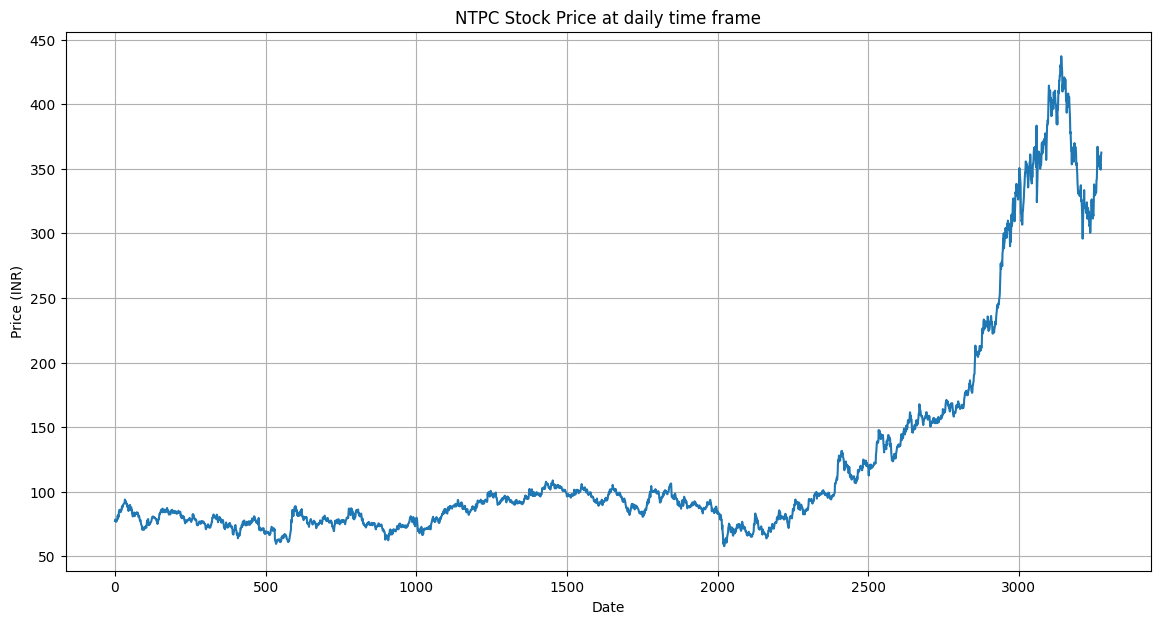

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title("NTPC Stock Price at daily time frame")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close
Ticker,NTPC.NS
0,77.480545
1,78.558372
2,78.460388
3,76.819160
4,76.892654
...,...
3270,349.799988
3271,352.950012
3272,349.350006


In [ ]:
df.shape

(3275, 1)

# Dataset Spliting for training (70%) and testing (30%)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,NTPC.NS,NTPC.NS,NTPC.NS,NTPC.NS,NTPC.NS
0,2012-01-02,77.480545,78.803324,76.917133,78.803324,1404067
1,2012-01-03,78.558372,79.121775,77.750008,78.141945,2140398
2,2012-01-04,78.460388,78.876825,77.774509,78.876825,1876118
3,2012-01-05,76.819160,78.827819,75.961798,78.607356,3196855
4,2012-01-06,76.892654,77.162106,76.059791,76.672191,2624210
...,...,...,...,...,...,...
3270,2025-04-07,349.799988,351.399994,324.000000,328.000000,18025165
3271,2025-04-08,352.950012,358.250000,350.000000,356.850006,17506712
3272,2025-04-09,349.350006,354.799988,348.200012,354.000000,7462119


In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])
print(data.shape)
print(train.shape)
print(test.shape)

(3275, 6)
(2292, 6)
(983, 6)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,NTPC.NS,NTPC.NS,NTPC.NS,NTPC.NS,NTPC.NS
0,2012-01-02,77.480545,78.803324,76.917133,78.803324,1404067
1,2012-01-03,78.558372,79.121775,77.750008,78.141945,2140398
2,2012-01-04,78.460388,78.876825,77.774509,78.876825,1876118
3,2012-01-05,76.819160,78.827819,75.961798,78.607356,3196855
4,2012-01-06,76.892654,77.162106,76.059791,76.672191,2624210


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,NTPC.NS,NTPC.NS,NTPC.NS,NTPC.NS,NTPC.NS
2292,2021-04-26,85.370461,86.662685,84.078229,86.662685,24369413
2293,2021-04-27,85.078667,86.329211,84.786868,85.078667,17763436
2294,2021-04-28,86.370903,86.662695,85.162046,85.745631,15160578
2295,2021-04-29,85.912354,87.538058,85.578874,87.204578,11588556
2296,2021-04-30,85.412132,88.079963,85.078659,85.245396,15321193


# Dataset normalization by using MinMax scaler
---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
test

Price,Date,Close,High,Low,Open,Volume
Ticker,,NTPC.NS,NTPC.NS,NTPC.NS,NTPC.NS,NTPC.NS
2292,2021-04-26,85.370461,86.662685,84.078229,86.662685,24369413
2293,2021-04-27,85.078667,86.329211,84.786868,85.078667,17763436
2294,2021-04-28,86.370903,86.662695,85.162046,85.745631,15160578
2295,2021-04-29,85.912354,87.538058,85.578874,87.204578,11588556
2296,2021-04-30,85.412132,88.079963,85.078659,85.245396,15321193
...,...,...,...,...,...,...
3270,2025-04-07,349.799988,351.399994,324.000000,328.000000,18025165
3271,2025-04-08,352.950012,358.250000,350.000000,356.850006,17506712
3272,2025-04-09,349.350006,354.799988,348.200012,354.000000,7462119


In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.42660392],
       [0.41384418],
       [0.42802194],
       ...,
       [0.50183187],
       [0.48333516],
       [0.48253079]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2192, 100, 1)

#  LSTM Model

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()

# First LSTM layer with more units and higher dropout rate
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))  # Higher dropout for better regularization

# Second LSTM layer with more units and higher dropout rate
model.add(LSTM(units=150, activation='relu', return_sequences=True))
model.add(Dropout(0.4))  # Slightly higher dropout rate

# Third LSTM layer with more units and dropout
model.add(LSTM(units=200, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Dropout increased further to prevent overfitting

# Fourth LSTM layer with more units
model.add(LSTM(units=250, activation='relu'))
model.add(Dropout(0.5))  # Same dropout rate for the last layer

# Output layer
model.add(Dense(units=1))  # Prediction of stock price (regression problem)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 150)       │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 200)       │       280,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 200)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 250)            │       451,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,451 (3.52 MB)

 Trainable params: 923,451 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

#  Model Training

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs =5)

Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 136ms/step - loss: 0.1047 - mean_absolute_error: 0.2483
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0126 - mean_absolute_error: 0.0870
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0099 - mean_absolute_error: 0.0769
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0094 - mean_absolute_error: 0.0760
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0082 - mean_absolute_error: 0.0711


In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(983, 1)

In [ ]:
past_80_days = pd.DataFrame(train_close[-80:])

In [ ]:
test_df = pd.DataFrame(test_close)

# Defining the final test dataset by including the last 100 rows of the training dataset to predict the first column of the testing dataset.

---


In [ ]:
# final_df = past_80_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_80_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,80.298679
1,81.552083
2,81.269059
3,80.056092
4,79.328317


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02188879],
       [0.02529861],
       [0.02452866],
       ...,
       [0.76647814],
       [0.7583168 ],
       [0.80184392]])

In [ ]:
input_data.shape

(1063, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(80, input_data.shape[0]):
   x_test.append(input_data[i-80: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(983, 80, 1)
(983,)


# Prediction of Closing Price and plotting the Graph

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


In [ ]:
y_pred.shape

(983, 1)

In [ ]:
y_test

array([0.03920172, 0.03489249, 0.03670693, 0.04067591, 0.03534606,
       0.03341827, 0.0399955 , 0.04101612, 0.04158312, 0.03931509,
       0.04385116, 0.04838721, 0.06244897, 0.06188194, 0.05564491,
       0.05882014, 0.06006755, 0.05745929, 0.05813976, 0.05825315,
       0.06176857, 0.06199539, 0.05655206, 0.05360368, 0.05054182,
       0.05507786, 0.05315007, 0.05655212, 0.05632528, 0.05779951,
       0.06993344, 0.06766542, 0.07412924, 0.07310867, 0.07288187,
       0.07152105, 0.07061388, 0.07152106, 0.06970666, 0.06029435,
       0.07220148, 0.07299527, 0.06925303, 0.07356229, 0.06857264,
       0.06709837, 0.07072724, 0.06834584, 0.07004688, 0.07084067,
       0.07129427, 0.0689128 , 0.0695932 , 0.06879942, 0.07106746,
       0.07140766, 0.0754901 , 0.07730452, 0.07594374, 0.07356225,
       0.08013955, 0.07276846, 0.07424265, 0.07152104, 0.07401586,
       0.07458287, 0.07038706, 0.06868602, 0.07242824, 0.07220149,
       0.07118087, 0.06891283, 0.06766544, 0.07220144, 0.06857

In [ ]:
y_pred

array([[0.17180711],
       [0.1716494 ],
       [0.17150429],
       [0.1713809 ],
       [0.1712878 ],
       [0.17122605],
       [0.17119141],
       [0.17118226],
       [0.17119741],
       [0.17123504],
       [0.17129062],
       [0.17136198],
       [0.17145017],
       [0.17156637],
       [0.17171952],
       [0.17190798],
       [0.17212617],
       [0.17236686],
       [0.17261823],
       [0.1728684 ],
       [0.17310709],
       [0.17332916],
       [0.17353217],
       [0.17371027],
       [0.1738559 ],
       [0.17396122],
       [0.17402653],
       [0.1740545 ],
       [0.17405263],
       [0.17402954],
       [0.17399465],
       [0.17396581],
       [0.1739568 ],
       [0.17398182],
       [0.17404854],
       [0.17415723],
       [0.17430094],
       [0.17446822],
       [0.17464754],
       [0.17482665],
       [0.1749866 ],
       [0.17512225],
       [0.17523527],
       [0.17532629],
       [0.17540032],
       [0.17545818],
       [0.17549859],
       [0.175

In [ ]:
scaler.scale_

array([0.00272044])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor
y_pred

array([[ 409.38623],
       [ 409.01044],
       [ 408.66464],
       [ 408.37067],
       [ 408.1488 ],
       [ 408.00168],
       [ 407.91913],
       [ 407.8973 ],
       [ 407.93344],
       [ 408.02307],
       [ 408.15552],
       [ 408.32556],
       [ 408.5357 ],
       [ 408.8126 ],
       [ 409.17752],
       [ 409.6266 ],
       [ 410.1465 ],
       [ 410.72   ],
       [ 411.31897],
       [ 411.9151 ],
       [ 412.48386],
       [ 413.013  ],
       [ 413.49673],
       [ 413.9211 ],
       [ 414.26813],
       [ 414.5191 ],
       [ 414.6747 ],
       [ 414.74136],
       [ 414.7369 ],
       [ 414.6819 ],
       [ 414.59875],
       [ 414.53003],
       [ 414.50854],
       [ 414.56818],
       [ 414.72717],
       [ 414.98615],
       [ 415.32858],
       [ 415.72717],
       [ 416.15448],
       [ 416.58127],
       [ 416.9624 ],
       [ 417.2856 ],
       [ 417.55493],
       [ 417.77182],
       [ 417.9482 ],
       [ 418.0861 ],
       [ 418.18237],
       [ 418.

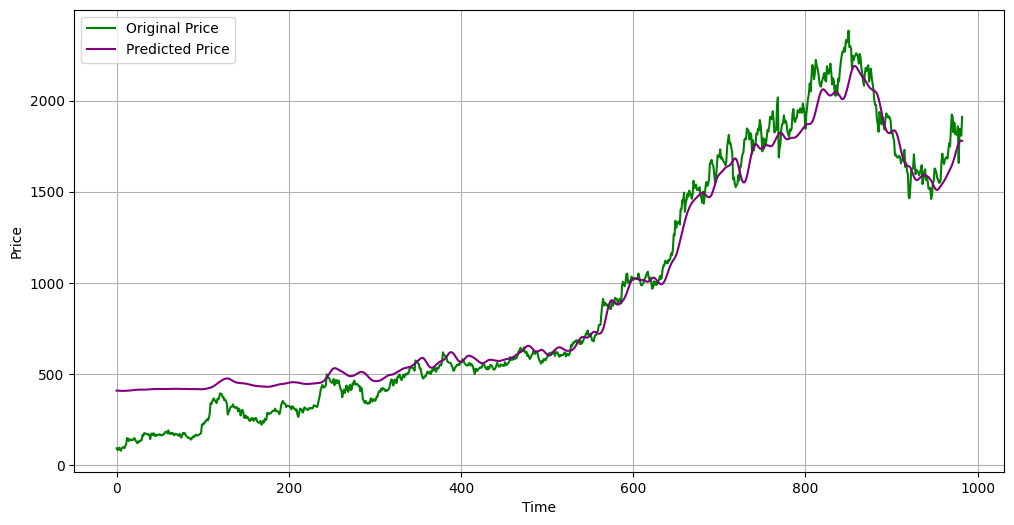

In [ ]:
import matplotlib.pyplot as plt

#  y_test and y_pred are  data arrays
plt.figure(figsize=(12, 6))

# Custom colors: Green for Original Price and Purple for Predicted Price
plt.plot(y_test, 'g', label="Original Price")  # Green
plt.plot(y_pred, '#800080', label="Predicted Price")  # Purple using hex code

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation

Calculation of mean absolute error and R2 Score

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))


Mean absolute error on test set: 10.32%


In [ ]:
from sklearn.metrics import r2_score
actual = y_test
predicted = y_pred
r2 = r2_score(actual, predicted)
print("R2 score:", r2)

R2 score: 0.9651722637787055


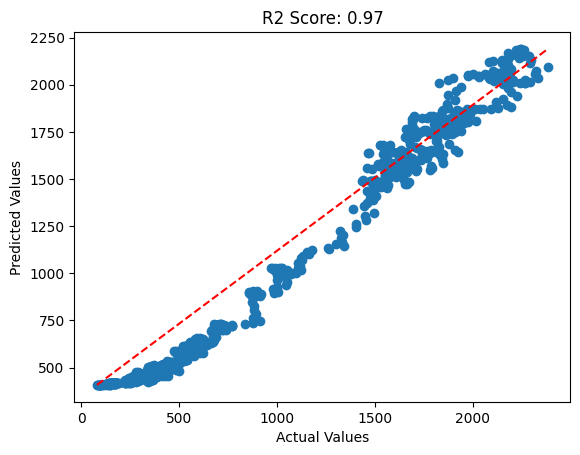

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()